In [1]:
from keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                 include_top = False,
                  input_shape = (150,150,3))

In [2]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = 'E:/Study/study/python/NLP/deeplearning_record/Downloads/cats_and_dogs_small'
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir,'validation')
test_dir = os.path.join(base_dir,'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20
def extract_features(directory,sample_count):
    features = np.zeros(shape=(sample_count,4,4,512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
                    directory,
                    target_size = (150,150),
                    batch_size = batch_size,
                    class_mode = 'binary'
    )
    i = 0
    for inputs_batch,labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i*batch_size : (i+1)*batch_size] = features_batch
        labels[i*batch_size : (i+1)*batch_size] = labels_batch
        i += 1
        if i*batch_size >= sample_count:
            break
    return features,labels


train_features,train_labels = extract_features(train_dir,2000)
validation_features,validation_labels = extract_features(validation_dir,1000)
test_features,test_labels = extract_features(test_dir,1000)
                        

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
train_features = np.reshape(train_features,(2000,4 * 4 * 512))
validation_features = np.reshape(validation_features,(1000,4 * 4 * 512))
test_features = np.reshape(test_features,(1000,4 * 4 * 512))

In [4]:
from keras import layers,models,optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim= 4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
             loss='binary_crossentropy',
             metrics=['acc'])

history = model.fit(train_features,train_labels,
                   epochs=30,
                   batch_size=20,
                   validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 1s 10ms/step - loss: 0.6276 - acc: 0.6455 - val_loss: 0.4698 - val_acc: 0.7960
Epoch 2/30
100/100 [==============================] - 1s 7ms/step - loss: 0.4384 - acc: 0.8000 - val_loss: 0.3719 - val_acc: 0.8480
Epoch 3/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3560 - acc: 0.8465 - val_loss: 0.3313 - val_acc: 0.8710
Epoch 4/30
100/100 [==============================] - 1s 7ms/step - loss: 0.3089 - acc: 0.8750 - val_loss: 0.3047 - val_acc: 0.8810
Epoch 5/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2873 - acc: 0.8785 - val_loss: 0.3054 - val_acc: 0.8740
Epoch 6/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2628 - acc: 0.8980 - val_loss: 0.2829 - val_acc: 0.8880
Epoch 7/30
100/100 [==============================] - 1s 7ms/step - loss: 0.2419 - acc: 0.9060 - val_loss: 0.2708 - val_acc: 0.8900
Epoch 8/30
100/100 [==============================] - 1s 7ms/step - loss: 0

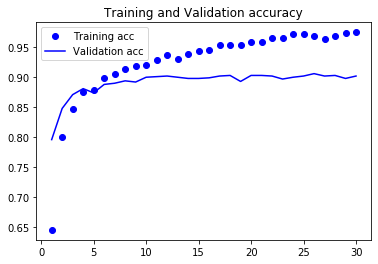

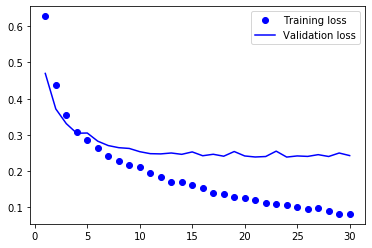

<Figure size 432x288 with 0 Axes>

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,"bo",label='Training acc')
plt.plot(epochs,val_acc,"b",label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
         
         
plt.plot(epochs,loss,"bo",label='Training loss')
plt.plot(epochs,val_loss,"b",label='Validation loss')
plt.legend()
plt.figure()
         
plt.show()

In [9]:
from keras import layers,models

model = models.Sequential()
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))


In [10]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=40,
                width_shift_range=0.2,
                height_shift_range=0.2,
                shear_range=0.2,
                zoom_range=0.2,
                horizontal_flip=True,
                fill_mode='nearest'
)
test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
                train_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary'
)
validation_generator = test_datagen.flow_from_directory(
                validation_dir,
                target_size=(150,150),
                batch_size=20,
                class_mode='binary'
)

model.compile(
            loss='binary_crossentropy',
            optimizer=optimizers.RMSprop(lr=2e-5),
            metrics=['acc'])

history = model.fit_generator(
            train_generator,
            steps_per_epoch=100,
            epochs=30,
            validation_data=validation_generator,
            validation_steps=50
)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 25s 254ms/step - loss: 0.8510 - acc: 0.4890 - val_loss: 0.7298 - val_acc: 0.5030
Epoch 2/30
100/100 [==============================] - 26s 263ms/step - loss: 0.7240 - acc: 0.5235 - val_loss: 0.7117 - val_acc: 0.5080
Epoch 3/30
100/100 [==============================] - 30s 300ms/step - loss: 0.7283 - acc: 0.5450 - val_loss: 0.6875 - val_acc: 0.5360
Epoch 4/30
100/100 [==============================] - 32s 315ms/step - loss: 0.7392 - acc: 0.5245 - val_loss: 0.6911 - val_acc: 0.5320
Epoch 5/30
100/100 [==============================] - 30s 296ms/step - loss: 0.7606 - acc: 0.5035 - val_loss: 0.6939 - val_acc: 0.5160
Epoch 6/30
100/100 [==============================] - 30s 299ms/step - loss: 0.7279 - acc: 0.5340 - val_loss: 0.6752 - val_acc: 0.5670
Epoch 7/30
100/100 [==============================] - 30s 304ms/step - loss: 0.7386 - acc: 0.5100 - val_lo

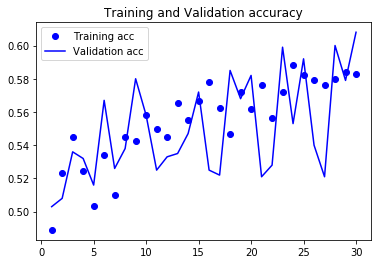

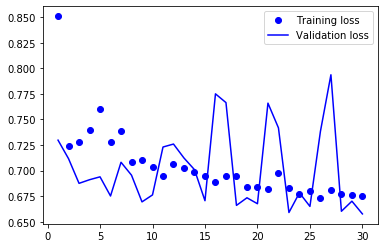

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,"bo",label='Training acc')
plt.plot(epochs,val_acc,"b",label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
         
         
plt.plot(epochs,loss,"bo",label='Training loss')
plt.plot(epochs,val_loss,"b",label='Validation loss')
plt.legend()
plt.figure()
         
plt.show()

In [14]:
#冻结直到某一所有层
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if(layer.name=='block5_conv1'):
        set_trainable = True
    if set_trainable:
        layer.trainabe = True
    else:
        layer.trainable = False

In [17]:
model.compile(loss='binary_crossentropy',
             optimizer=optimizers.RMSprop(lr=1e-5),
             metrics=['acc'])

history = model.fit_generator(
        train_generator,
        steps_per_epoch=100,
        epochs=100,
        validation_data=validation_generator,
        validation_steps=50)



import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1,len(acc)+1)

plt.plot(epochs,acc,"bo",label='Training acc')
plt.plot(epochs,val_acc,"b",label='Validation acc')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
         
         
plt.plot(epochs,loss,"bo",label='Training loss')
plt.plot(epochs,val_loss,"b",label='Validation loss')
plt.legend()
plt.figure()
         
plt.show()

Epoch 1/100
100/100 [==============================] - 25s 253ms/step - loss: 0.6659 - acc: 0.5915 - val_loss: 0.6622 - val_acc: 0.6070
Epoch 2/100
100/100 [==============================] - 25s 250ms/step - loss: 0.6647 - acc: 0.5930 - val_loss: 0.6599 - val_acc: 0.6010
Epoch 3/100
100/100 [==============================] - 25s 254ms/step - loss: 0.6563 - acc: 0.5985 - val_loss: 0.6565 - val_acc: 0.6050
Epoch 4/100
100/100 [==============================] - 29s 291ms/step - loss: 0.6599 - acc: 0.5875 - val_loss: 0.6510 - val_acc: 0.6190
Epoch 5/100
100/100 [==============================] - 30s 302ms/step - loss: 0.6568 - acc: 0.6105 - val_loss: 0.6548 - val_acc: 0.6120
Epoch 6/100
100/100 [==============================] - 30s 299ms/step - loss: 0.6629 - acc: 0.5930 - val_loss: 0.6535 - val_acc: 0.6050
Epoch 7/100
100/100 [==============================] - 30s 303ms/step - loss: 0.6608 - acc: 0.6030 - val_loss: 0.6552 - val_acc: 0.5970
Epoch 8/100
100/100 [===========================

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

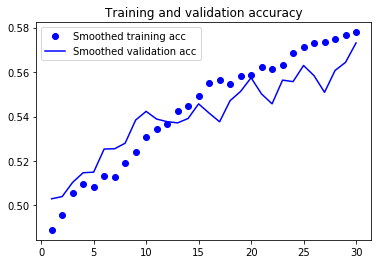

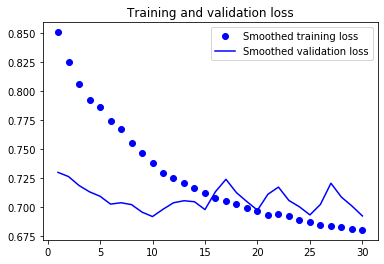

<Figure size 432x288 with 0 Axes>

In [23]:
#曲线平滑
def smooth_cruve(points,factor=0.8):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous *factor + point*(1-factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

plt.plot(epochs,smooth_cruve(acc),'bo',label='Smoothed training acc')
plt.plot(epochs,smooth_cruve(val_acc),'b',label='Smoothed validation acc')
plt.title("Training and validation accuracy")
plt.legend()

plt.figure()

plt.plot(epochs,smooth_cruve(loss),'bo',label='Smoothed training loss')
plt.plot(epochs,smooth_cruve(val_loss),'b',label='Smoothed validation loss')
plt.title("Training and validation loss")
plt.legend()

plt.figure()

In [26]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')
test_loss,test_acc = model.evaluate_generator(test_generator,steps=50)
print('test acc：',test_acc)



Found 1000 images belonging to 2 classes.
Instructions for updating:
Please use Model.evaluate, which supports generators.
test acc： 0.5979999899864197
